In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Data Loading

In [3]:
dta = (pd.read_csv('Data\kspi_st_clse.csv', encoding = 'cp949'))\
        .set_index('TRD_DT')
dta.index = pd.to_datetime(dta.index)
dta.head()

,삼성전자,SK하이닉스,현대차,셀트리온,삼성바이오로직스,POSCO,삼성물산,KB금융,LG화학,현대모비스,...,한진해운,대우증권스팩,동양밸류스팩,우리스팩1호,경남은행.1,연합과기,중국원양자원,평산차업 KDR,중국고섬,SBI모기지
TRD_DT,,,,,,,,,,,,,,,,,,,,,
2000-01-04,305500,505463,20700,NaN,NaN,142000,NaN,NaN,NaN,6610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,279000,453444,20800,NaN,NaN,149500,NaN,NaN,NaN,7100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,281000,429889,19700,NaN,NaN,144500,NaN,NaN,NaN,6540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,277000,425963,20300,NaN,NaN,145000,NaN,NaN,NaN,6520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,288500,422037,20000,NaN,NaN,143000,NaN,NaN,NaN,6280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 52 Week High / Low

### Log Chart / 52-Week Band

In [110]:
def ln_chart_cls(data, stk = '삼성전자'):
    fig, ax = plt.subplots()
    fig.set_size_inches((10,8))

    data[stk].apply(np.log).dropna().plot(ax = ax)
    data[stk].asfreq('D').rolling(window = 52*7, min_periods = 52).min().dropna().apply(np.log).plot(ax = ax)
    data[stk].asfreq('D').rolling(window = 52*7, min_periods = 52).max().dropna().apply(np.log).plot(ax = ax)
    
    ln_ytick = dta[stk].apply(np.log).quantile([0, 0.1, 0.3, 0.7, 0.9, 1])
    b_ytick = np.round(np.exp(ln_ytick), -2)
    
    plt.yticks(ln_ytick, b_ytick)
    

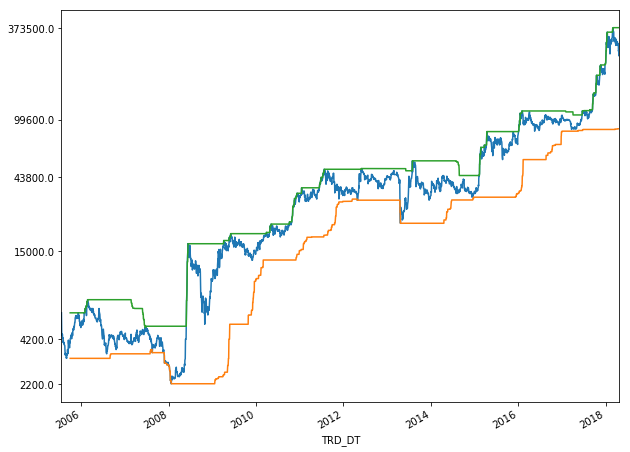

In [111]:
ln_chart_cls(dta, '셀트리온')

### The Number of 52 Week Highs

1. How much it occurs during the period.

In [135]:
## 총 상장기간
def isnotnot(data):
    a = np.isnan(data)
    
    return ~a 

a_1 = dta.apply(isnotnot, axis = 0).sum(axis = 0)
a_1.head()

삼성전자        4527
SK하이닉스      4527
현대차         4527
셀트리온        3166
삼성바이오로직스     360
dtype: int64

In [139]:
## 52 Week High 찍은 기간

a_2 = pd.Series(index = dta.columns, 
                data = np.zeros(dta.shape[1]))


for col in dta.columns:
    val = dta[col].asfreq('D').rolling(window = 52*7, min_periods = 52).max().dropna().drop_duplicates().shape[0]
    a_2[col] = val
    
a_2.head()

삼성전자        278.0
SK하이닉스      330.0
현대차         258.0
셀트리온        152.0
삼성바이오로직스     46.0
dtype: float64

In [145]:
fft_high = pd.concat([a_1, a_2], axis = 1)
fft_high.columns = ['거래일', '52주상']
fft_high['52상비율'] = fft_high['52주상'].div(fft_high['거래일'])
fft_high.head()

,거래일,52주상,52상비율
삼성전자,4527,278.0,0.061409
SK하이닉스,4527,330.0,0.072896
현대차,4527,258.0,0.056991
셀트리온,3166,152.0,0.048010
삼성바이오로직스,360,46.0,0.127778


In [158]:
## 거래일 3000일 이상 중
## 52상 비율 평균 / 최대 / 최소
cond_1 = fft_high['거래일'] > 3000
fft_high[cond_1].sort_values(['52상비율'], ascending = False).head(20)

,거래일,52주상,52상비율
삼성엔지니어링,4527,410.0,0.090568
삼환기업,3779,333.0,0.088119
STX엔진,3465,302.0,0.087157
중앙건설,3205,276.0,0.086115
대한전선,4527,388.0,0.085708
금호산업,4527,385.0,0.085045
에이블씨엔씨,3276,271.0,0.082723
대한해운,4527,374.0,0.082615
남광토건,4527,368.0,0.081290
알앤엘바이오,3301,268.0,0.081188


In [168]:
pd.Series(data = {'평균': fft_high[cond_1]['52상비율'].mean(),
             '최대': fft_high[cond_1]['52상비율'].max(),
            '최소': fft_high[cond_1]['52상비율'].min()})

최대    0.090568
최소    0.010594
평균    0.053148
dtype: float64

## 연별 52주 신고가~

In [181]:
## 년별 52주 신고가 개수
(dta['셀트리온'].asfreq('D').rolling(window = 52*7, min_periods = 52).max().dropna().drop_duplicates()).\
resample('A').count()

TRD_DT
2005-12-31     1
2006-12-31     6
2007-12-31    19
2008-12-31     9
2009-12-31     7
2010-12-31    24
2011-12-31    17
2012-12-31     1
2013-12-31     4
2014-12-31     9
2015-12-31    10
2016-12-31     8
2017-12-31    25
2018-12-31    12
Freq: A-DEC, Name: 셀트리온, dtype: int64

In [182]:
## 년별 거래일 일수
()dta['셀트리온'].resample('A').count()

TRD_DT
2000-12-31      0
2001-12-31      0
2002-12-31      0
2003-12-31      0
2004-12-31      0
2005-12-31    115
2006-12-31    247
2007-12-31    246
2008-12-31    248
2009-12-31    253
2010-12-31    251
2011-12-31    248
2012-12-31    248
2013-12-31    247
2014-12-31    245
2015-12-31    248
2016-12-31    246
2017-12-31    243
2018-12-31     81
Freq: A-DEC, Name: 셀트리온, dtype: int64

## 52 Week High / 52 Week Low

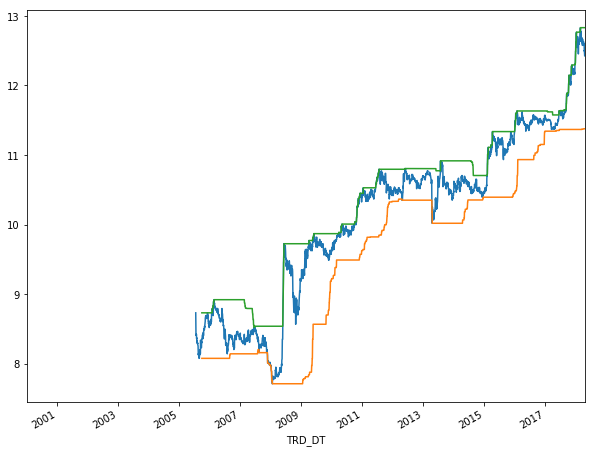

In [94]:
fig, ax = plt.subplots()
fig.set_size_inches((10,8))

dta['셀트리온'].apply(np.log).plot(ax = ax)
dta['셀트리온'].asfreq('D').rolling(window = 52*7, min_periods = 52).min().dropna().apply(np.log).plot(ax = ax)
dta['셀트리온'].asfreq('D').rolling(window = 52*7, min_periods = 52).max().dropna().apply(np.log).plot(ax = ax)

In [91]:
def ln_chart_cls(data, sec = '삼성전자'):
    

dta['SK하이닉스'].apply(np.log).quantile([0, 0.1, 0.3, 0.7, 0.9, 1])

0.0     7.882315
0.1     9.140347
0.3    10.000614
0.7    10.491274
0.9    11.195196
1.0    13.206228
Name: SK하이닉스, dtype: float64

In [7]:
dta.resample('A').max().head()

,삼성전자,SK하이닉스,현대차,셀트리온,삼성바이오로직스,POSCO,삼성물산,KB금융,LG화학,현대모비스,...,한진해운,대우증권스팩,동양밸류스팩,우리스팩1호,경남은행.1,연합과기,중국원양자원,평산차업 KDR,중국고섬,SBI모기지
TRD_DT,,,,,,,,,,,,,,,,,,,,,
2000-12-31,388000,543741,20800,NaN,NaN,149500,NaN,NaN,NaN,7100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-31,283500,134856,29500,NaN,NaN,127000,NaN,NaN,32853.0,18900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-12-31,432000,63306,53900,NaN,NaN,160000,NaN,NaN,75093.0,35500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-31,480000,9740,50500,NaN,NaN,163000,NaN,NaN,78507.0,64100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-31,637000,14400,60600,NaN,NaN,203000,NaN,NaN,88036.0,65500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
